In [67]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ab_data.csv')

In [3]:
df

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


## Probabilty of converting

$$ Beta(converted,notconvert)$$

The Beta Distribution solves a very similar problem to the Binomial Distribution only for the case where we know n and k but not p

![beta](beta.png)

Where n is trials and k is conversions

In [4]:
not_convert, convert = df['converted'].value_counts()

In [5]:
df['converted'].value_counts()

0    259241
1     35237
Name: converted, dtype: int64

In [6]:
total = len(df)

In [7]:
not_convert

259241

In [8]:
convert

35237

$$Beta(259241,35237)$$

We can infer that our average conversion rate is

In [9]:
avg_conv = convert / total

In [10]:
f'Average conversion rate {avg_conv}'

'Average conversion rate 0.11965919355605512'

Since our conversion rate is continous, we are going to bin conversion rates for probability. 
Realistically our probability falls within a range so we want to be sure 

In [11]:
a = 35237
b = 259241

In [14]:
stats.beta.stats(a, b)

(array(0.11965919), array(3.57719467e-07))

## Total

Text(0, 0.5, 'density')

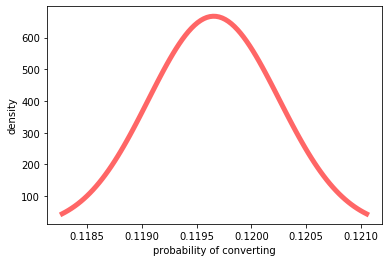

In [15]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(stats.beta.ppf(0.01, a, b),
                stats.beta.ppf(0.99, a, b), 100)
ax.plot(x, stats.beta.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='beta pdf')
ax.set_xlabel('probability of converting')
ax.set_ylabel('density')

Text(0, 0.5, 'cumlative probability')

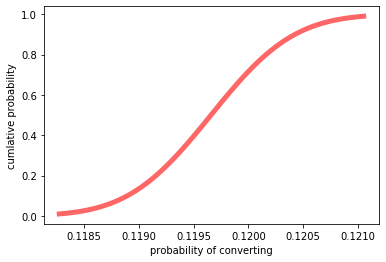

In [16]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(stats.beta.ppf(0.01, a, b),
                stats.beta.ppf(0.99, a, b), 100)
ax.plot(x, stats.beta.cdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='beta pdf')
ax.set_xlabel('probability of converting')
ax.set_ylabel('cumlative probability')

## Control Conversion

In [20]:
control_df = df.loc[df['landing_page'] == 'old_page']

In [23]:
no_convert, convert = control_df['converted'].value_counts()

In [24]:
convert / len(control_df)

0.12047759085568362

In [25]:
stats.beta.stats(convert, no_convert)

(array(0.12047759), array(7.19660017e-07))

Text(0, 0.5, 'density')

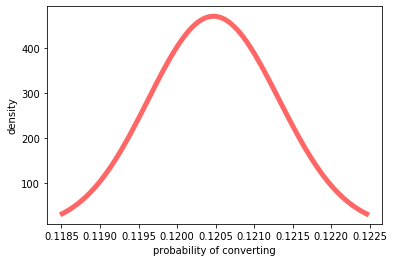

In [26]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(stats.beta.ppf(0.01, convert, no_convert),
                stats.beta.ppf(0.99, convert, no_convert), 100)
ax.plot(x, stats.beta.pdf(x, convert, no_convert),
       'r-', lw=5, alpha=0.6, label='beta pdf')
ax.set_xlabel('probability of converting')
ax.set_ylabel('density')

## Treatment Conversion

In [27]:
treatment_df = df.loc[df['landing_page'] == 'new_page']
no_convert_t, convert_t = treatment_df['converted'].value_counts()

In [28]:
convert_t / len(treatment_df)

0.11884079625642663

Text(0, 0.5, 'density')

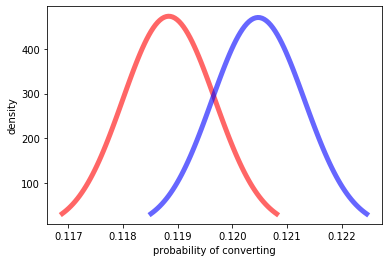

In [34]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(stats.beta.ppf(0.01, convert_t, no_convert_t),
                stats.beta.ppf(0.99, convert_t, no_convert_t), 100)
ax.plot(x, stats.beta.pdf(x, convert_t, no_convert_t),
       'r-', lw=5, alpha=0.6, label='beta pdf')


x = np.linspace(stats.beta.ppf(0.01, convert, no_convert),
                stats.beta.ppf(0.99, convert, no_convert), 100)
ax.plot(x, stats.beta.pdf(x, convert, no_convert),
       'b-', lw=5, alpha=0.6, label='beta pdf')
ax.set_xlabel('probability of converting')
ax.set_ylabel('density')

In [35]:
import mcerp

### Probability that control is better than the treatment

In [57]:
beta_t = mcerp.Beta(convert_t, no_convert_t)
beta_c = mcerp.Beta(convert, no_convert)

In [64]:
t_samples = beta_t.rv.rvs(size=10000)
c_samples = beta_c.rv.rvs(size=10000)

In [65]:
sum(c_samples > t_samples) / 10000

0.9159

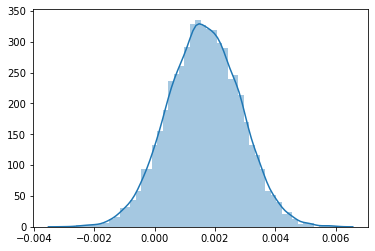

In [69]:
# distribution of conversion probability from treatment page and convert
sns.distplot(c_samples - t_samples)